In [1]:
import numpy, pandas, cobra, seaborn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(20, 10), 
                            'axes.labelsize':40})

In [4]:
def flux_transformer(v):
    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (numpy.log2(v + 0.125) + 3) / 4
        return numpy.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = numpy.log2(v)
    elif v < 0:
        v = numpy.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -numpy.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

# Load E coli.core model

In [5]:
model = cobra.io.load_model('textbook')
model

Name,e_coli_core
Memory address,14f7a5220
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [6]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [7]:
solution = model.optimize()
print(solution.objective_value)

solution = cobra.flux_analysis.pfba(model)
print(solution.objective_value)

0.8739215069684301
518.4220855176065


# Simulate 100 O2 conditions

In [8]:
location = solution.fluxes.index == 'EX_o2_e'
o2location = numpy.where(location == True)[0][0]
print(o2location)

print(solution.fluxes['EX_o2_e'])
lower_limit = -22; resolution = 10
oxygen_lower_boundaries = numpy.linspace(-22, 0, num=221)  
print(oxygen_lower_boundaries)

35
-21.79949265599875
[-22.  -21.9 -21.8 -21.7 -21.6 -21.5 -21.4 -21.3 -21.2 -21.1 -21.  -20.9
 -20.8 -20.7 -20.6 -20.5 -20.4 -20.3 -20.2 -20.1 -20.  -19.9 -19.8 -19.7
 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -19.  -18.9 -18.8 -18.7 -18.6 -18.5
 -18.4 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7 -17.6 -17.5 -17.4 -17.3
 -17.2 -17.1 -17.  -16.9 -16.8 -16.7 -16.6 -16.5 -16.4 -16.3 -16.2 -16.1
 -16.  -15.9 -15.8 -15.7 -15.6 -15.5 -15.4 -15.3 -15.2 -15.1 -15.  -14.9
 -14.8 -14.7 -14.6 -14.5 -14.4 -14.3 -14.2 -14.1 -14.  -13.9 -13.8 -13.7
 -13.6 -13.5 -13.4 -13.3 -13.2 -13.1 -13.  -12.9 -12.8 -12.7 -12.6 -12.5
 -12.4 -12.3 -12.2 -12.1 -12.  -11.9 -11.8 -11.7 -11.6 -11.5 -11.4 -11.3
 -11.2 -11.1 -11.  -10.9 -10.8 -10.7 -10.6 -10.5 -10.4 -10.3 -10.2 -10.1
 -10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9
  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7
  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5
  -6.4  -6.3  -6.2  -6.1  -6.

In [9]:
solution.fluxes.index

Index(['ACALD', 'ACALDt', 'ACKr', 'ACONTa', 'ACONTb', 'ACt2r', 'ADK1', 'AKGDH',
       'AKGt2r', 'ALCD2x', 'ATPM', 'ATPS4r', 'Biomass_Ecoli_core', 'CO2t',
       'CS', 'CYTBD', 'D_LACt2', 'ENO', 'ETOHt2r', 'EX_ac_e', 'EX_acald_e',
       'EX_akg_e', 'EX_co2_e', 'EX_etoh_e', 'EX_for_e', 'EX_fru_e', 'EX_fum_e',
       'EX_glc__D_e', 'EX_gln__L_e', 'EX_glu__L_e', 'EX_h_e', 'EX_h2o_e',
       'EX_lac__D_e', 'EX_mal__L_e', 'EX_nh4_e', 'EX_o2_e', 'EX_pi_e',
       'EX_pyr_e', 'EX_succ_e', 'FBA', 'FBP', 'FORt2', 'FORti', 'FRD7',
       'FRUpts2', 'FUM', 'FUMt2_2', 'G6PDH2r', 'GAPD', 'GLCpts', 'GLNS',
       'GLNabc', 'GLUDy', 'GLUN', 'GLUSy', 'GLUt2r', 'GND', 'H2Ot', 'ICDHyr',
       'ICL', 'LDH_D', 'MALS', 'MALt2_2', 'MDH', 'ME1', 'ME2', 'NADH16',
       'NADTRHD', 'NH4t', 'O2t', 'PDH', 'PFK', 'PFL', 'PGI', 'PGK', 'PGL',
       'PGM', 'PIt2r', 'PPC', 'PPCK', 'PPS', 'PTAr', 'PYK', 'PYRt2', 'RPE',
       'RPI', 'SUCCt2_2', 'SUCCt3', 'SUCDi', 'SUCOAS', 'TALA', 'THD2', 'TKT1',
       'TKT2', 'TP

In [10]:
# define storing variables
system_fluxes_transformed = []
oxygen_fluxes = []
biomass_values = []
excluded_fluxes = ['Biomass_Ecoli_core', 'EX_o2_e', 'EX_h2o_e', 'H2Ot']

for boundary in oxygen_lower_boundaries:

    # define new boundary conditions
    model.reactions.EX_o2_e.lower_bound = boundary
    #print(model.reactions.EX_o2_e.lower_bound, model.reactions.EX_o2_e.upper_bound)

    # simulate
    solution = cobra.flux_analysis.pfba(model)  

    # store biomass values and oxygen fluxes
    biomass_values.append(solution.objective_value)
    oxygen_fluxes.append(solution.fluxes[o2location])
    #print('\t', solution.objective_value, solution.fluxes[o2location])

    # store all fluxes excluding particular ones
    storing_fluxes = solution.fluxes.drop(excluded_fluxes)
    fluxes_transformed = [flux_transformer(flux_value) for flux_value in storing_fluxes]
    system_fluxes_transformed.append(fluxes_transformed)

# Plot biomass

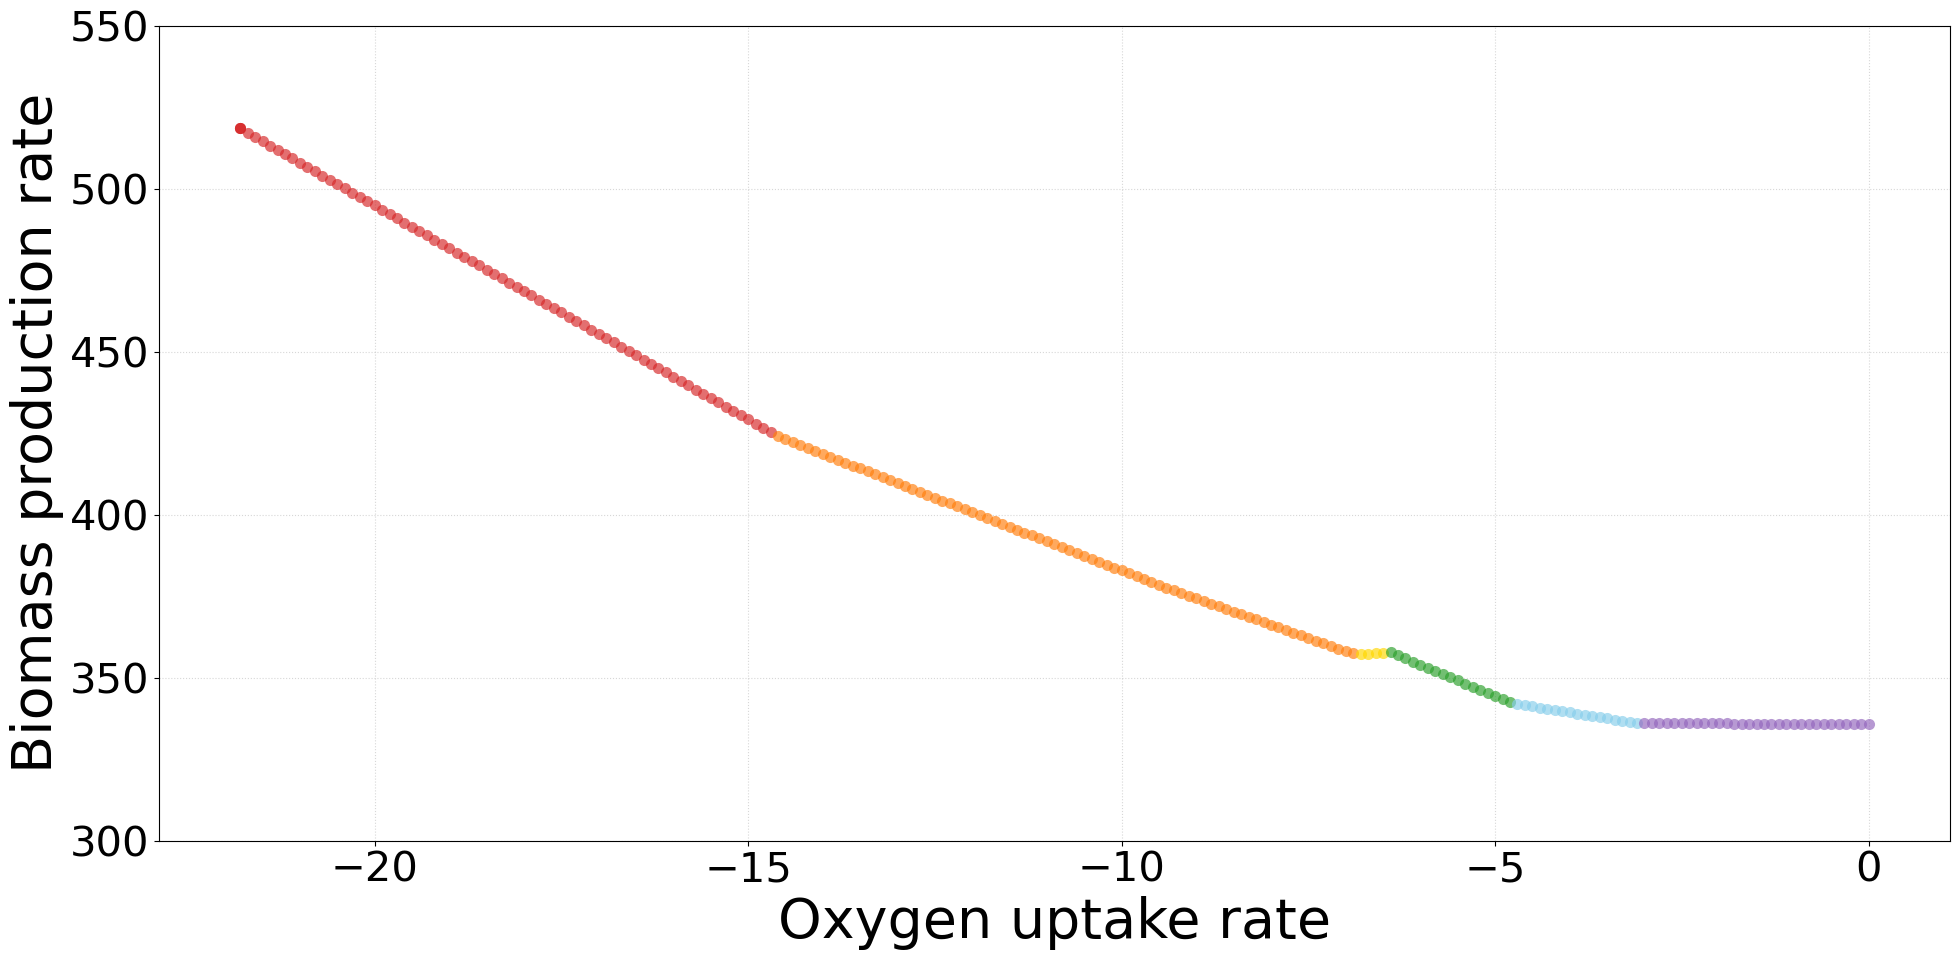

In [12]:
# plot
plotting_colors = []
for i in range(len(oxygen_fluxes)):
    o = -oxygen_fluxes[i]

    if o > 14.6:
        the_color = 'tab:red'
    elif (o <= 14.6) & (o > 6.8):
        the_color = 'tab:orange'
    elif (o <= 6.8) & (o > 6.4):
        the_color = 'gold'
    elif (o <= 6.4) & (o > 4.7):
        the_color = 'tab:green'
    elif (o <= 4.7) & (o > 3):
        the_color = 'skyblue'
    elif (o <= 3) & (o >= 0):
        the_color = 'tab:purple'
    else:
        the_color = 'black'

    plotting_colors.append(the_color)
    
    matplotlib.pyplot.plot(oxygen_fluxes[i], biomass_values[i], 'o', 
    color=the_color, markersize=8, alpha=2/3, mec='None')

matplotlib.pyplot.xlabel('Oxygen uptake rate')
matplotlib.pyplot.ylabel('Biomass production rate')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.ylim([300, 550])
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('biomass.svg')

# Plot fluxes

In [ ]:
# define data for PCA
df = pandas.DataFrame(system_fluxes_transformed, columns=storing_fluxes.index)

# scale it
scaler = sklearn.preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)

# run PCA
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df) 
principalDf = pandas.DataFrame(data=principalComponents, columns = ['PC1', 'PC2'])
print('variance explained', pca.explained_variance_ratio_)


matplotlib.pyplot.scatter(principalDf['PC1'], principalDf['PC2'],
            c=plotting_colors, s=150, alpha=2/3, edgecolors='none')

matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('pca.svg')

# Plot flux differences

In [ ]:
difference = df.iloc[-1] - df.iloc[0]
max_flux = df.abs().max(axis=0)

# Coloring based if value is positive or negative at the 100th exploration (max)
for i in range(len(difference)):
    
    if difference[i] != 0:

        # define colors
        if df.iloc[-1][i] > 0:
            the_color = 'tab:red'
        elif df.iloc[-1][i] < 0:
            the_color = 'tab:blue'
        elif df.iloc[-1][i] == 0:
            the_color = 'black'
        else:
            print('we have a problem', value)

        # define marker
        if (df.iloc[0][i] > 0) & (df.iloc[-1][i] < 0): # a flux that goes from export to import
            the_marker = 'v'
        elif (df.iloc[0][i] < 0) & (df.iloc[-1][i] > 0): # a flux that goes from import to export
            the_marker = '^'
        else:
            the_marker = 'o'

        # define name
        flux_name = difference.index[i]

        matplotlib.pyplot.plot(difference[i], max_flux[i], color=the_color, alpha=1/3, ms=30, mec='None', marker=the_marker)
        matplotlib.pyplot.text(difference[i], max_flux[i], flux_name, fontsize=8, horizontalalignment='center', verticalalignment='center')
    

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:blue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='v', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='^', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['J$_n$ > 0', 'J$_n$ < 0', 'J$_n$ = 0', 'R (- | +)', 'R (+ | -)', 'NR'], ncol=2, fontsize=16, loc=3)

# close figure

# close figure
matplotlib.pyplot.xlim(-8.3, 8.3)
matplotlib.pyplot.ylim(0, 6)

matplotlib.pyplot.xlabel('Flux change [log2 flux]')
matplotlib.pyplot.ylabel('Overall max. flux [log2 flux]')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('scatter.svg')

adrian todo 30.06.23. consider removing fluxes that we change, like o2 and biomass too, before doing PCA. Heatmap will be next step. alphas for relevance in scatter plot.

In [ ]:
zeroth_exploration_average = numpy.mean(all_fluxes_transformed[0])
hundredth_exploration_average = numpy.mean(all_fluxes_transformed[99])

print(zeroth_exploration_average)
print(hundredth_exploration_average)


In [ ]:
difference = df.iloc[-1] - df.iloc[0]
max_flux = df.abs().max(axis=0)

# Coloring based if value is positive or negative at the 100th exploration (max)
x = []; y = []; the_colors = []
for i in range(len(difference)):
    if difference[i] != 0:
        x.append(difference[i])
        y.append(max_flux[i])

        # now colors
        if df.iloc[-1][i] > 0:
            color = 'tab:red'
        elif df.iloc[-1][i] < 0:
            color = 'tab:blue'
        elif df.iloc[-1][i] == 0:
            color = 'black'
        else:
            print('we have a problem', value)
        the_colors.append(color)

matplotlib.pyplot.scatter(x, y, c=the_colors, s=400, alpha=2/3)
matplotlib.pyplot.xlabel('Difference')
matplotlib.pyplot.ylabel('Flux Average')
matplotlib.pyplot.grid(alpha=0.5, ls=':')

# Conditions for the lines
y_up = 1.1 * max_flux.max()
x_left = 1.1 * difference.min()
x_right = 1.1 * difference.max()

# Plot lines
lines = [((-1, -1), (1, y_up)), ((x_left, -1), (1, 1)),
         ((1, 1), (y_up, 1)), ((-1, x_right), (1, 1))]

for l in lines:
    matplotlib.pyplot.plot(*l, color='black')

# Set limits for lines
matplotlib.pyplot.xlim([x_left, x_right])
matplotlib.pyplot.ylim([0.9 * max_flux.min(), y_up])

matplotlib.pyplot.show()



In [ ]:
#all_fluxes_transformed = [[flux_transformer(v) for v in flux_list] for flux_list in all_fluxes]

df_0th_transformed = pandas.DataFrame(all_fluxes_transformed[0], index=[r.id for r in model.reactions]).transpose()
df_100th_transformed = pandas.DataFrame(all_fluxes_transformed[-1], index=[r.id for r in model.reactions]).transpose()

difference_fluxes_transformed = df_100th_transformed.iloc[0] - df_0th_transformed.iloc[0]

df_difference_fluxes_transformed = difference_fluxes_transformed.reset_index()

df_difference_fluxes_transformed.columns = ['Flux Name', 'Flux Difference']

positive_fluxes = df_difference_fluxes_transformed[df_difference_fluxes_transformed['Flux Difference'] >= 0]
negative_fluxes = df_difference_fluxes_transformed[df_difference_fluxes_transformed['Flux Difference'] < 0]

abs_flux_changes_transformed = difference_fluxes_transformed.abs()

colors = ['blue' if x >= 0 else 'red' for x in difference_fluxes_transformed]

fig, ax = matplotlib.pyplot.subplots(figsize = (20, 10))

ax.scatter(difference_fluxes_transformed, abs_flux_changes_transformed, c = colors, s = 100)
ax.set_xlabel('Difference in Transformed Flux (100th exploration - 0th exploration)')
ax.set_ylabel('Flux Change')
ax.set_title('Volcano Plot - Transformed Fluxes')
ax.grid(True)

matplotlib.pyplot.show()


In [ ]:
negative_fluxes

In [ ]:
loadings = pandas.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = df.columns)

# Rank reactions based on absolute loading, since loading can be negative, 
# and a large negative value is also influential.
loadings['PC1_rank'] = loadings['PC1'].abs().rank(ascending=False)
loadings['PC2_rank'] = loadings['PC2'].abs().rank(ascending=False)

# Sort by rank
loadings_sorted_PC1 = loadings.sort_values(by = 'PC1_rank')
loadings_sorted_PC2 = loadings.sort_values(by = 'PC2_rank')

print(loadings_sorted_PC1)
print(loadings_sorted_PC2)


In [ ]:
print("Top 20 fluxes for PC1:")
print(loadings_sorted_PC1.head(20))

print('____________________________________________________________________________')

print("\nTop 20 fluxes for PC2:")
print(loadings_sorted_PC2.head(20))


In [ ]:
top_reactions_PC1 = loadings_sorted_PC1.index[:10].tolist()
top_reactions_PC2 = loadings_sorted_PC2.index[:10].tolist()

top_reactions = list(set(top_reactions_PC1 + top_reactions_PC2))

top_flux_data = df[top_reactions].transpose()

g = seaborn.clustermap(top_flux_data, cmap = 'viridis', col_cluster = False, 
               yticklabels = True, xticklabels = False, figsize = (20, 14))

labels = [str(i) if i % 10 == 0 else '' for i in range(1, 101)] 

g.ax_heatmap.set_xticks(numpy.arange(100))
g.ax_heatmap.set_xticklabels(labels, rotation = 90)

matplotlib.pyplot.title('Clustermap of the Top 10 Features from Each Principal Component')

matplotlib.pyplot.show()
#row fluxes
#columns would be the 100 simulations
#use clustermap from seaborn


In [ ]:
all_flux_data = df.transpose()  

g = seaborn.clustermap(all_flux_data, cmap = 'viridis', col_cluster = False, 
               yticklabels = True, xticklabels = False, figsize = (20, 40))

labels = [str(i) if i % 10 == 0 else '' for i in range(1, 101)] 

g.ax_heatmap.set_xticks(numpy.arange(100))
g.ax_heatmap.set_xticklabels(labels, rotation = 90)

matplotlib.pyplot.title('Clustermap of All Features')
matplotlib.pyplot.show()
# Why is the ordering different here?